# **REGRESSION**

FULL MACHINE LEARNING A-Z :::::::::::::::::::::::::::

1) DATA PREPROCESSING:::

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()


Saving Data.csv to Data (2).csv


In [0]:
import pandas as pd
path = '/content/Data.csv'
data_frame = pd.read_csv(path)
Y = data_frame.iloc[:,3].values
X = data_frame.iloc[:,0:3].values

print('you did it')
print(X.shape)
print(Y.shape)
print(X)
print(Y)

you did it
(10, 3)
(10,)
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [0]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])
print(X)


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
print(X)

[[0 44.0 72000.0]
 [2 27.0 48000.0]
 [1 30.0 54000.0]
 [2 38.0 61000.0]
 [1 40.0 63777.77777777778]
 [0 35.0 58000.0]
 [2 38.77777777777778 52000.0]
 [0 48.0 79000.0]
 [1 50.0 83000.0]
 [0 37.0 67000.0]]


we could have directly don this implementation for one-hot replacement:::

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(categorical_features=[0])  #to oonly be operated on the zeroth column of the input matrix
onehot2 = OneHotEncoder()
Y = Y.reshape((-1,1))
X = onehot.fit_transform(X).toarray()
Y = onehot2.fit_transform(Y).toarray()
print(X)
print(Y)


[[1.00000000e+00 0.00000000e+00 0.00000000e+00 4.40000000e+01
  7.20000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.70000000e+01
  4.80000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 3.00000000e+01
  5.40000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.80000000e+01
  6.10000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+01
  6.37777778e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.50000000e+01
  5.80000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.87777778e+01
  5.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.80000000e+01
  7.90000000e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 5.00000000e+01
  8.30000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
  6.70000000e+04]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


splitting dataset to train and test:::

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8, 5)
(2, 5)
(8, 2)
(2, 2)


In [0]:
from sklearn.preprocessing import StandardScaler
sd_x = StandardScaler()
X_train = sd_x.fit_transform(X_train)
X_test = sd_x.transform(X_test)
print(X_train)
print(X_test)

[[ 1.         -0.57735027 -0.57735027  0.58099085  0.57243968]
 [ 1.         -0.57735027 -0.57735027 -0.42873118  0.14221362]
 [ 1.         -0.57735027 -0.57735027 -0.71722319 -0.6321933 ]
 [-1.         -0.57735027  1.73205081 -1.87119123 -1.49264544]
 [-1.         -0.57735027  1.73205081 -0.17229384 -1.14846458]
 [-1.          1.73205081 -0.57735027  0.00400683 -0.13504318]
 [ 1.         -0.57735027 -0.57735027  1.15797487  1.17475618]
 [-1.          1.73205081 -0.57735027  1.44646688  1.51893703]]
[[-1.         -0.57735027  1.73205081 -0.28448518 -0.37405766]
 [-1.          1.73205081 -0.57735027 -1.43845322 -0.97637416]]


  using linear regression:::

In [0]:
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [0]:
path = '/content/Salary_Data.csv'
data_frame = pd.read_csv(path)
Y = data_frame.iloc[:,0:1].values
X = data_frame.iloc[:,1:2].values

print('you did it')
print(X.shape)
print(Y.shape)
print(X)
print(Y)


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.preprocessing import StandardScaler
sd_x = StandardScaler()
X_train = sd_x.fit_transform(X_train)
X_test = sd_x.transform(X_test)
print(X_train)
print(X_test)

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
print("Actual Test Y:")
print(Y_test)
print("Predicted Test Y:")
print(Y_pred)


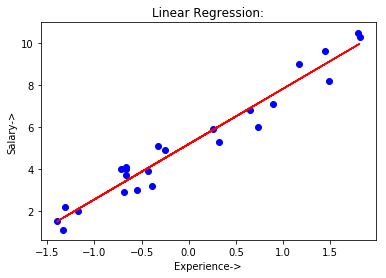

In [0]:
import matplotlib.pyplot as plt
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title("Linear Regression:")
plt.xlabel("Experience->")
plt.ylabel("Salary->")
plt.show()

MULTI-LINEAR-REGRESSION:

In [0]:
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [0]:
path = '/content/50_Startups.csv'
data_frame = pd.read_csv(path)
X = data_frame.iloc[:,0:4].values
Y = data_frame.iloc[:,4:5].values
print('#1')
print('you did it')
print(X.shape)
print(Y.shape)
print(X[:3])
print(Y[:3])


print('#2')
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])


from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(categorical_features=[3])  #to oonly be operated on the zeroth column of the input matrix
X = onehot.fit_transform(X).toarray()
print(X[:3])
print(Y[:3])


print('#3')
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


print('#4')
from sklearn.preprocessing import StandardScaler
sd_x = StandardScaler()
X_train = sd_x.fit_transform(X_train)
X_test = sd_x.transform(X_test)
print(X_train[:3])
print(X_test[:3])

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
print("Actual Test Y:")
print(Y_test)
print("Predicted Test Y:")
print(Y_pred)

POLYNOMIAL REGRESSION(ie higher order equation):::::

> now herre we use the same linear regression model,but our inputs are  modified



In [0]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [0]:
import pandas as pd
path = '/content/Position_Salaries.csv'
data_frame = pd.read_csv(path)
X = data_frame.iloc[:,1:2].values
Y = data_frame.iloc[:,2:3].values

print('you did it')
print(X.shape)
print(Y.shape)
print(X[:3])
print(Y[:3])

you did it
(10, 1)
(10, 1)
[[1]
 [2]
 [3]]
[[45000]
 [50000]
 [60000]]


making polynomial features:


In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=10)
X_poly = poly_reg.fit_transform(X)
print(X_poly.shape)
print(X_poly[:3])

(10, 11)
[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
  1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01
  6.4000e+01 1.2800e+02 2.5600e+02 5.1200e+02 1.0240e+03]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02
  7.2900e+02 2.1870e+03 6.5610e+03 1.9683e+04 5.9049e+04]]


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_poly,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8, 11)
(2, 11)
(8, 1)
(2, 1)


In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
print("Actual Test Y:")
print(Y_test)
print("Predicted Test Y:")
print(Y_pred)

Actual Test Y:
[[110000]
 [ 50000]]
Predicted Test Y:
[[112540.29281114]
 [ 50807.74266119]]


plotting result

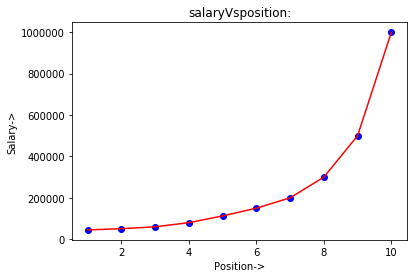

#1
[10.  9.  3.  7.  1.  4.  6.  8.]
#2
[[1000000]
 [ 500000]
 [  60000]
 [ 200000]
 [  45000]
 [  80000]
 [ 150000]
 [ 300000]]
#3
[[999999.99999971]
 [499999.99999911]
 [ 59999.99999994]
 [200000.00000062]
 [ 45000.00000038]
 [ 80000.00000054]
 [150000.00000035]
 [299999.99999953]]


In [0]:
import matplotlib.pyplot as plt
plt.scatter(X,Y,color='blue')
plt.plot(X,regressor.predict(X_poly),color='red')
plt.title('salaryVsposition:')
plt.xlabel('Position->')
plt.ylabel('Salary->')
plt.show()
print('#1')
print(X_train[:,1])
print('#2')
print(Y_train)
print('#3')
print(regressor.predict(X_train))

we observe several non differential point in the graph, so we need more datapoints to geta more differentiable graph, we do it by:::::

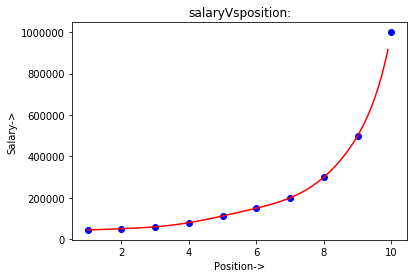

In [0]:
import numpy as np

X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((-1,1))

plt.scatter(X,Y,color='blue')
plt.plot(X_grid,regressor.predict(poly_reg.transform(X_grid)),color='red')
plt.title('salaryVsposition:')
plt.xlabel('Position->')
plt.ylabel('Salary->')
plt.show()

**SVR:** Support Vector Regression:::::

In [0]:
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries (1).csv


In [0]:
path = '/content/Position_Salaries.csv'
dataset = pd.read_csv(path)
X = dataset.iloc[:,1].values
Y = dataset.iloc[:,2].values
print(X.shape)
print(Y.shape)
print(X[:3])
print(X[:3])

(10,)
(10,)
[1 2 3]
[1 2 3]


NOW few import points to remember before doing SVR

1.   all the above algo's did internal sccaling, but SVR doesn't do so
      in SVR we have to di=o scaling on X as well as Y, and then fit the model and any prediction made by the model is in the scaled form so you need to unscale it then.
2.   SVR only  takes 2D numpy arrays as input ie you cannot pass a scalar value to it at time of predicting.



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


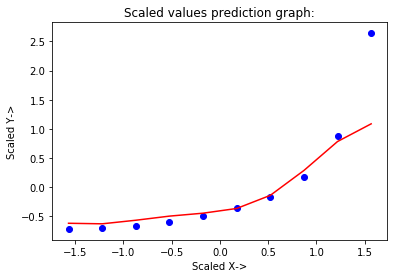

In [0]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sk_x = StandardScaler()
sk_y = StandardScaler()

X = X.reshape((-1,1))
Y = Y.reshape((-1,1))

X_scaled = sk_x.fit_transform(X)
Y_scaled = sk_y.fit_transform(Y)

regressor = SVR(kernel='rbf')           #for gaussian kernel
regressor.fit(X_scaled,Y_scaled)

#plotting the scalled values:::
plt.scatter(X_scaled,Y_scaled,color="blue")
plt.plot(X_scaled,regressor.predict(X_scaled),color="red")
plt.title('Scaled values prediction graph:')
plt.xlabel('Scaled X->')
plt.ylabel('Scaled Y->')
plt.show()

Now the output from SVR is scaled so to unscale it we it as:

In [0]:
Y_pred_scaled = regressor.predict(X_scaled)
Y_pred_unscaled = sk_y.inverse_transform(Y_pred_scaled)

print("Y true:")
print(Y[:3])
print('Y Predicted:')
print(Y_pred_unscaled[:3])

Y true:
[[45000]
 [50000]
 [60000]]
Y Predicted:
[73474.15615697 70786.94584626 88213.00902103]


to predict the output for a single value we do it as:

In [0]:
y_pred = sk_y.inverse_transform(regressor.predict(sk_x.transform(np.array([[5.5]]))))
print(y_pred)

[131106.77303274]


**DECISION TREES**

In [0]:
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries (2).csv


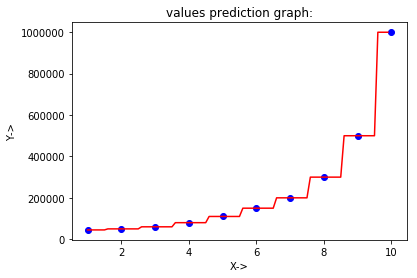

In [0]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/Position_Salaries (2).csv')
X = dataset.iloc[:,1].values
Y = dataset.iloc[:,2].values

X = X.reshape((-1,1))
Y = Y.reshape((-1,1))

X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((-1,1))

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X,Y)


plt.scatter(X,Y,color="blue")
plt.plot(X_grid,regressor.predict(X_grid),color="red")
plt.title('values prediction graph:')
plt.xlabel('X->')
plt.ylabel('Y->')
plt.show()

**RANDOM FOREST**

1.   for regression


In [0]:
uploads = files.upload()

Saving Position_Salaries.csv to Position_Salaries (3).csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Y->')

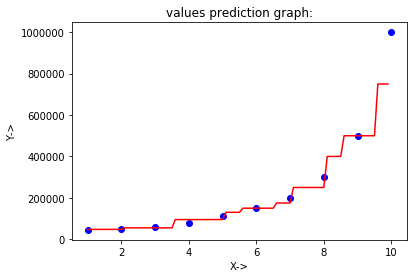

In [0]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/Position_Salaries (3).csv')
X = dataset.iloc[:,1].values
Y = dataset.iloc[:,2].values

X = X.reshape((-1,1))
Y = Y.reshape((-1,1))

X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((-1,1))

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=2)
regressor.fit(X,Y)


plt.scatter(X,Y,color="blue")
plt.plot(X_grid,regressor.predict(X_grid),color="red")
plt.title('values prediction graph:')
plt.xlabel('X->')
plt.ylabel('Y->')



---

# **CLASSIFICATION**

Linear

1.   Logistic Regression(needs external scaling)
2.   SVM(needs external scaling)

Non-Linear:

1.  KNN (requires external scaling)
2.  Kernel SVM
3.  RandomForest (for classification)
4. Naive Bayes(needs external scaling)
5. Decision Tree for Classification(no need to scale)
6. RandomForest




> IMPORTANT NOTE: all the above algorithm can be used for multi--classification as well , but no need to give one hot input for y-label, they do that internally , so just give the labels (y-label can be label encoded)





Logistic Regression:

In [0]:
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [0]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:,2:4].values
Y = dataset.iloc[:,4].values

print(X.shape)
print(Y.shape)

print(X[:3])
print(Y[:3])

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)



print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

sd_x = StandardScaler()
X_train = sd_x.fit_transform(X_train)
X_test = sd_x.transform(X_test)

(400, 2)
(400,)
[[   19 19000]
 [   35 20000]
 [   26 43000]]
[0 0 0]
(320, 2)
(80, 2)
(320,)
(80,)


In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[55  5]
 [ 7 13]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


K-NEAREST-NEIGHBOR:::

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #(no of neighbours,methos,euclidean distance)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[52  8]
 [ 2 18]]


**SVM**:SUPPORT VECTOR MACHINE

In [0]:
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [0]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:,2:4].values
Y = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

sk_x = StandardScaler()
X_train = sk_x.fit_transform(X_train)
X_test = sk_x.transform(X_test)

from sklearn.svm import SVC
classifier = SVC(C=1, kernel='linear')  #'rbf' for gaussian kernel
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)

print(cm)

[[50  4]
 [ 6 20]]


**NAIVE BAYES**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [0]:
import pandas as pd
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:,2:4].values
Y = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

from sklearn.preprocessing import StandardScaler
sk_x = StandardScaler()
X_train = sk_x.fit_transform(X_train)
X_test = sk_x.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

print(cm)

[[52  1]
 [ 8 19]]


**DECISION TREE**

In [0]:
uploaded = files.upload()

In [0]:
import pandas as pd
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:,2:4].values
Y = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

from sklearn.preprocessing import StandardScaler
sk_x = StandardScaler()
X_train = sk_x.fit_transform(X_train)
X_test = sk_x.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

print(cm)

**RANDOM FOREST **

In [0]:
uploaded = files.upload()

In [0]:
import pandas as pd
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
X = dataset.iloc[:,2:4].values
Y = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

from sklearn.preprocessing import StandardScaler
sk_x = StandardScaler()
X_train = sk_x.fit_transform(X_train)
X_test = sk_x.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy')
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

print(cm)

# **CLUSTERING**

**K-MEAN CLUSTERING**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


Finding the correct number of clusters

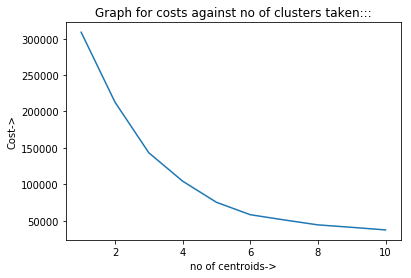

In [0]:
import pandas as pd
dataset = pd.read_csv('/content/Mall_Customers.csv')

X = dataset.iloc[:,2:5].values

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
WCSS = []

for i in range(1,11):
  kmean = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  kmean.fit(X)
  WCSS.append(kmean.inertia_)
  
plt.plot(range(1,11),WCSS)
plt.title('Graph for costs against no of clusters taken:::')
plt.xlabel('no of centroids->')
plt.ylabel('Cost->')
plt.show()

So we can see that elbow appears at around 5,
Thetefor training our final madel with 5 centroids

In [0]:
k_mean = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
y_kmean = k_mean.fit_predict(X)
print(y_kmean[:5])

[0 3 0 3 0]


**HEIRARCHICAL CLUSTERING**

we first build a dendrogram of the data to know in what form data is plresent which helps us to know how many number of centroids will be feasable

In [0]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


Saving Mall_Customers.csv to Mall_Customers (2).csv


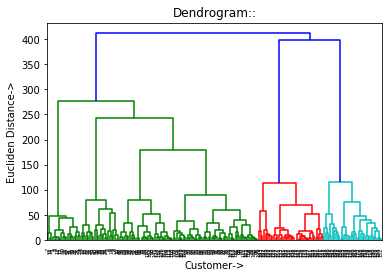

In [0]:
import pandas as pd
dataset = pd.read_csv('/content/Mall_Customers.csv')

X = dataset.iloc[:,2:5].values

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

plt.title('Dendrogram::')
plt.xlabel('Customer->')
plt.ylabel('Eucliden Distance->')
plt.show()

Therefor taking taking 6 centroids:::

In [0]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(X)
print(y_hc[:5])

[4 3 4 3 4]
